In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("housing_train.csv")

In [3]:
df.head(1)

,id,url,region,region_url,price,type,sqfeet,beds,baths,cats_allowed,...,wheelchair_access,electric_vehicle_charge,comes_furnished,laundry_options,parking_options,image_url,description,lat,long,state
0,7039061606,https://bham.craigslist.org/apa/d/birmingham-h...,birmingham,https://bham.craigslist.org,1195,apartment,1908,3,2.0,1,...,0,0,0,laundry on site,street parking,https://images.craigslist.org/00L0L_80pNkyDeG0...,Apartments In Birmingham AL Welcome to 100 Inv...,33.4226,-86.7065,al


In [4]:
df.columns

Index(['id', 'url', 'region', 'region_url', 'price', 'type', 'sqfeet', 'beds',
       'baths', 'cats_allowed', 'dogs_allowed', 'smoking_allowed',
       'wheelchair_access', 'electric_vehicle_charge', 'comes_furnished',
       'laundry_options', 'parking_options', 'image_url', 'description', 'lat',
       'long', 'state'],
      dtype='object')

# Numeric Columns

In [45]:
numeric_cols = df.select_dtypes(include=[int,float]).columns
numeric_cols

Index(['id', 'price', 'sqfeet', 'beds', 'baths', 'cats_allowed',
       'dogs_allowed', 'smoking_allowed', 'wheelchair_access',
       'electric_vehicle_charge', 'comes_furnished', 'lat', 'long'],
      dtype='object')

## Checking the distributions for detecting outliers

In [47]:
# creating a function for easier analysis
def plot_distribution(df, column):
    print(df[column].describe())
    
    fig , ax = plt.subplots(nrows = 1, ncols = 2, figsize=(12,5), dpi=100)

    ax[0].hist(df[column])
    ax[0].set_title(f"Histogram Plot of the {column} Feature")
    
    ax[1].boxplot(df[column], vert=False);
    ax[1].set_title(f"Box Plot of the {column} Feature")
    
    plt.tight_layout()
    plt.show()

count    2.651900e+05
mean     1.227285e+04
std      5.376352e+06
min      0.000000e+00
25%      8.170000e+02
50%      1.060000e+03
75%      1.450000e+03
max      2.768307e+09
Name: price, dtype: float64


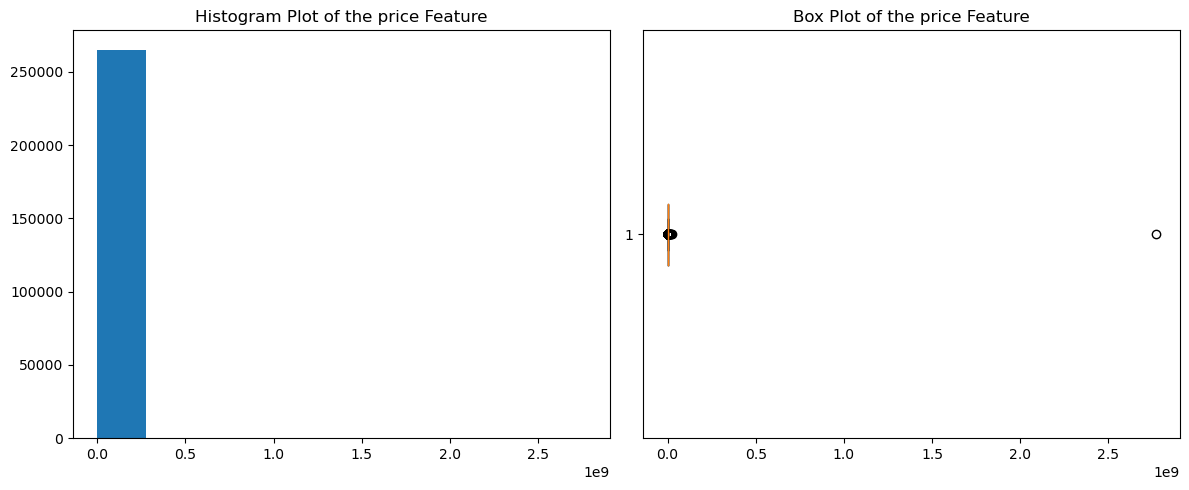

count    2.651900e+05
mean     1.093678e+03
std      2.306888e+04
min      0.000000e+00
25%      7.520000e+02
50%      9.500000e+02
75%      1.156000e+03
max      8.388607e+06
Name: sqfeet, dtype: float64


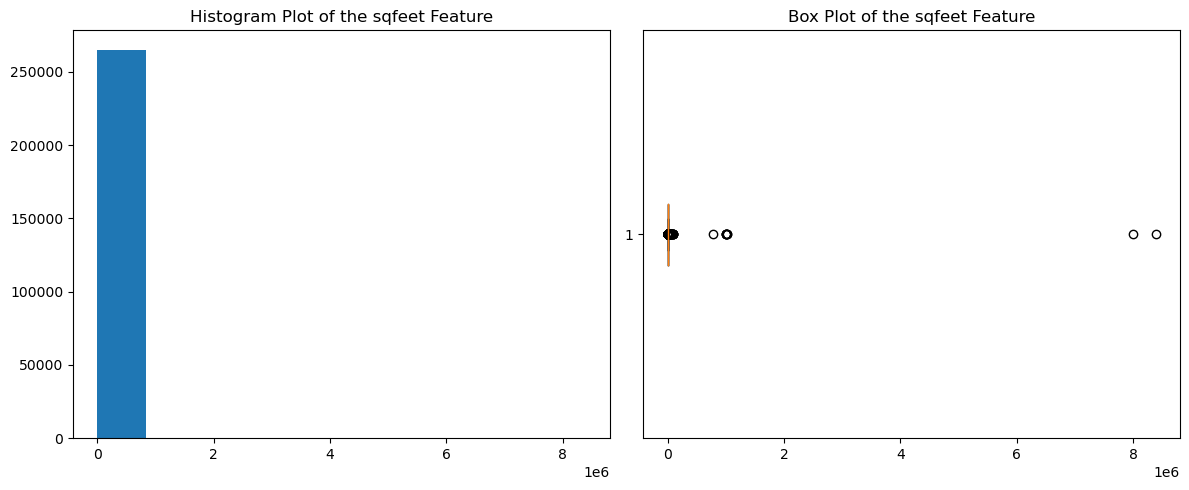

count    265190.000000
mean          1.912414
std           3.691900
min           0.000000
25%           1.000000
50%           2.000000
75%           2.000000
max        1100.000000
Name: beds, dtype: float64


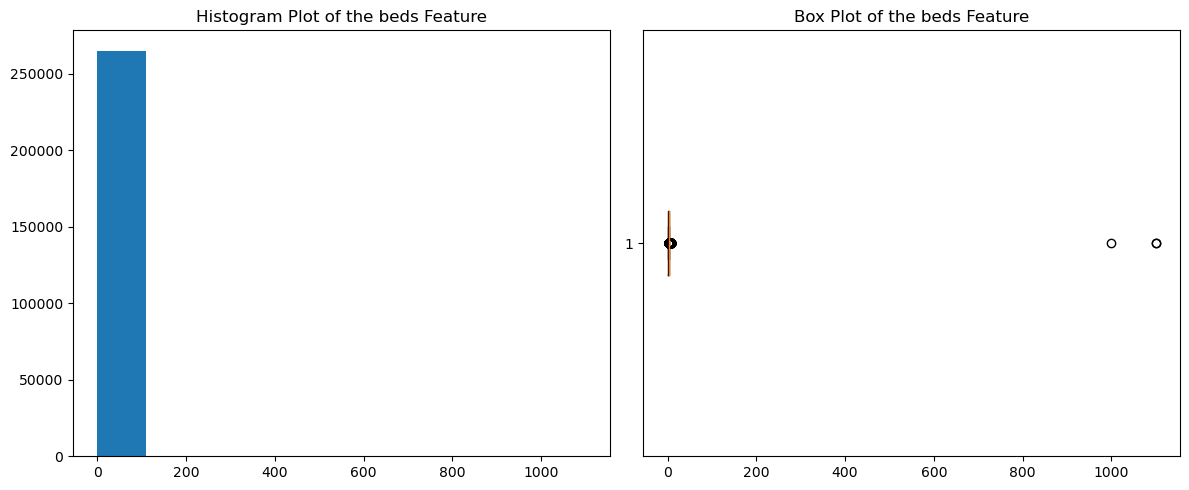

count    265190.000000
mean          1.483468
std           0.630208
min           0.000000
25%           1.000000
50%           1.000000
75%           2.000000
max          75.000000
Name: baths, dtype: float64


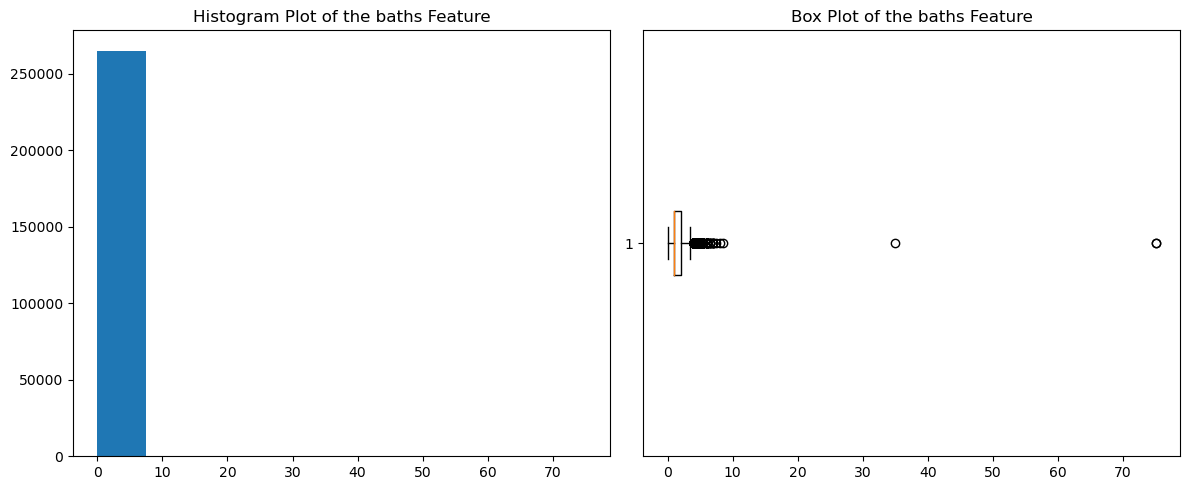

count    265190.000000
mean          0.716822
std           0.450543
min           0.000000
25%           0.000000
50%           1.000000
75%           1.000000
max           1.000000
Name: cats_allowed, dtype: float64


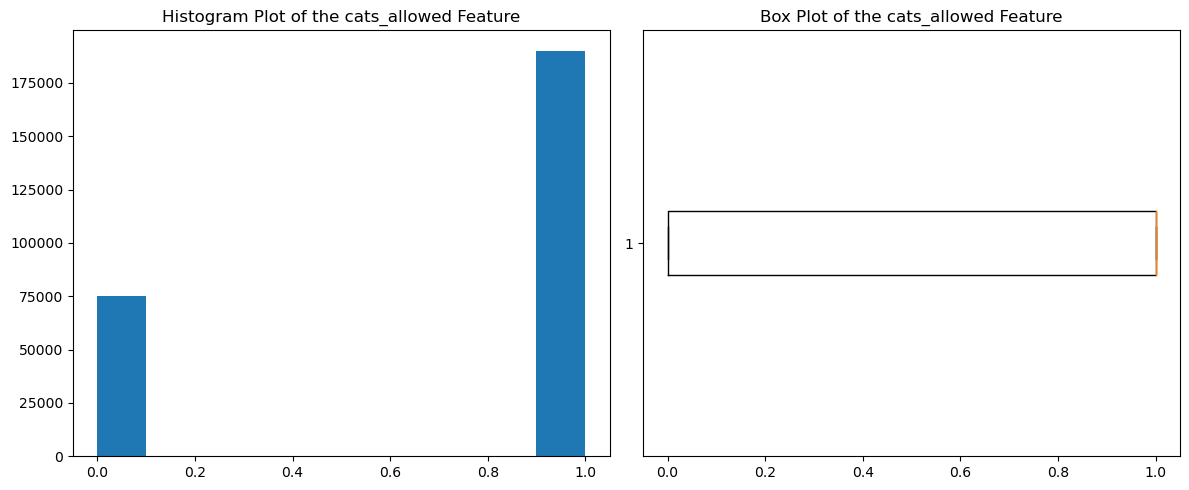

count    265190.000000
mean          0.696550
std           0.459749
min           0.000000
25%           0.000000
50%           1.000000
75%           1.000000
max           1.000000
Name: dogs_allowed, dtype: float64


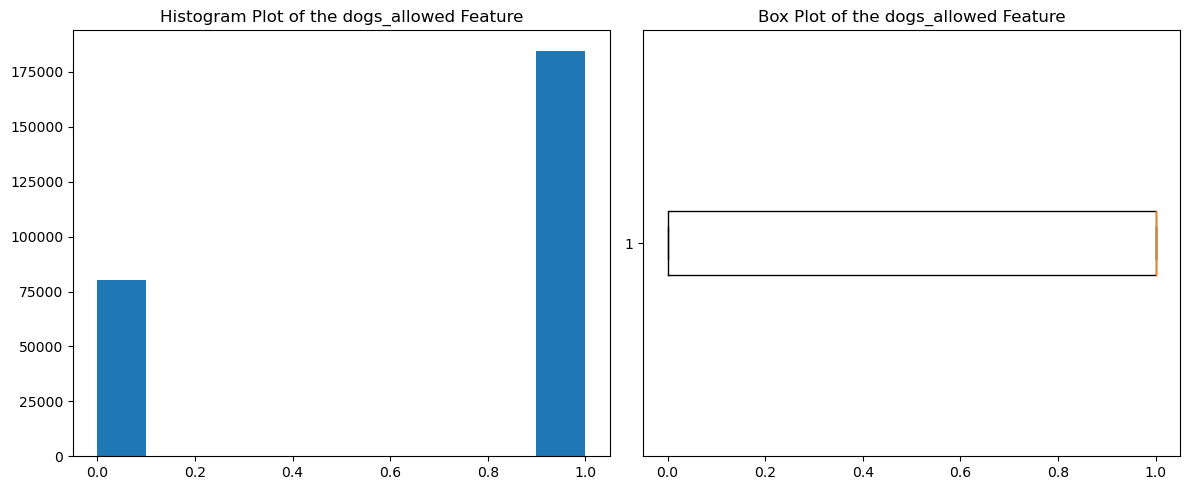

count    265190.000000
mean          0.733896
std           0.441920
min           0.000000
25%           0.000000
50%           1.000000
75%           1.000000
max           1.000000
Name: smoking_allowed, dtype: float64


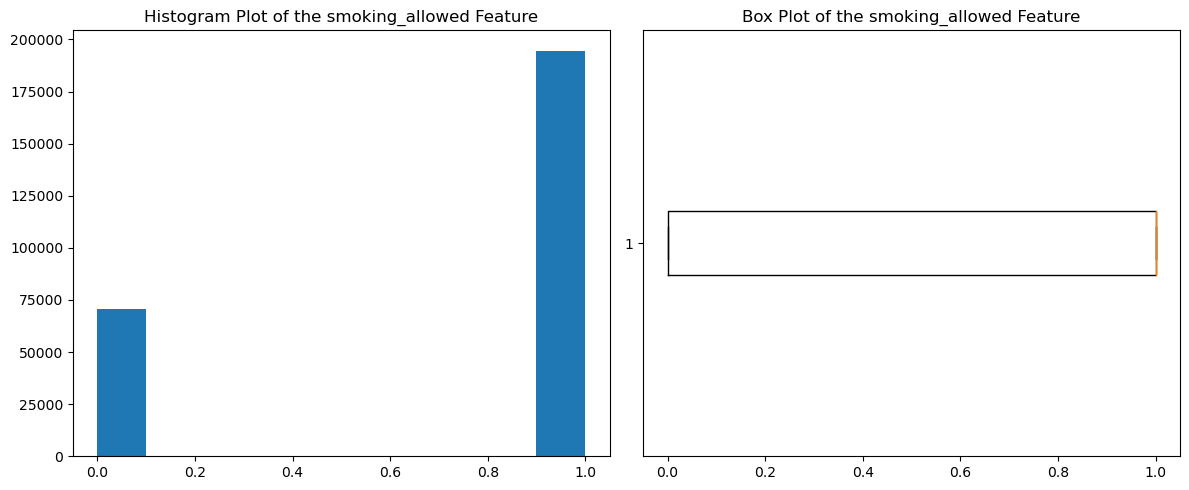

count    265190.000000
mean          0.078759
std           0.269362
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: wheelchair_access, dtype: float64


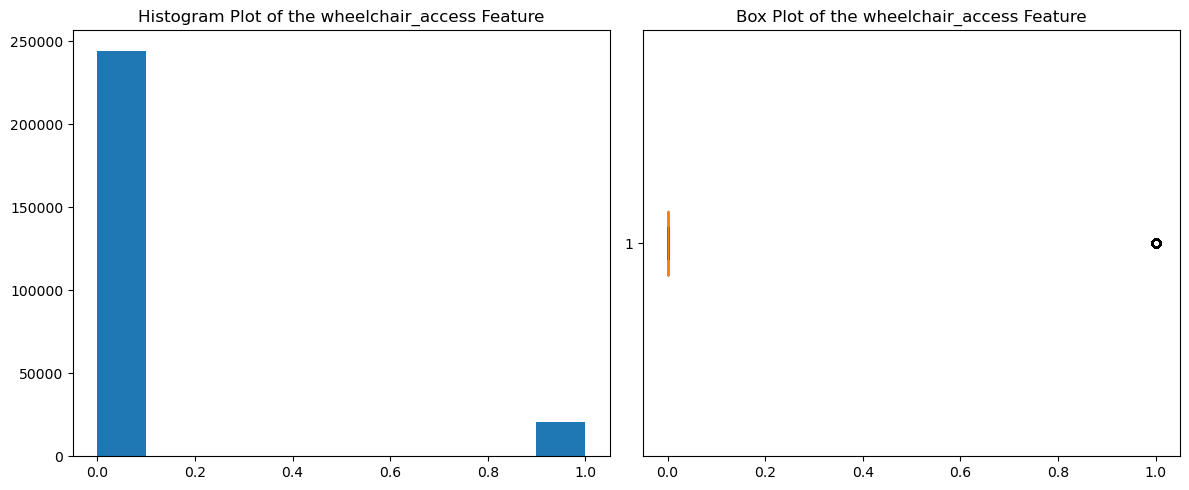

count    265190.000000
mean          0.014360
std           0.118968
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: electric_vehicle_charge, dtype: float64


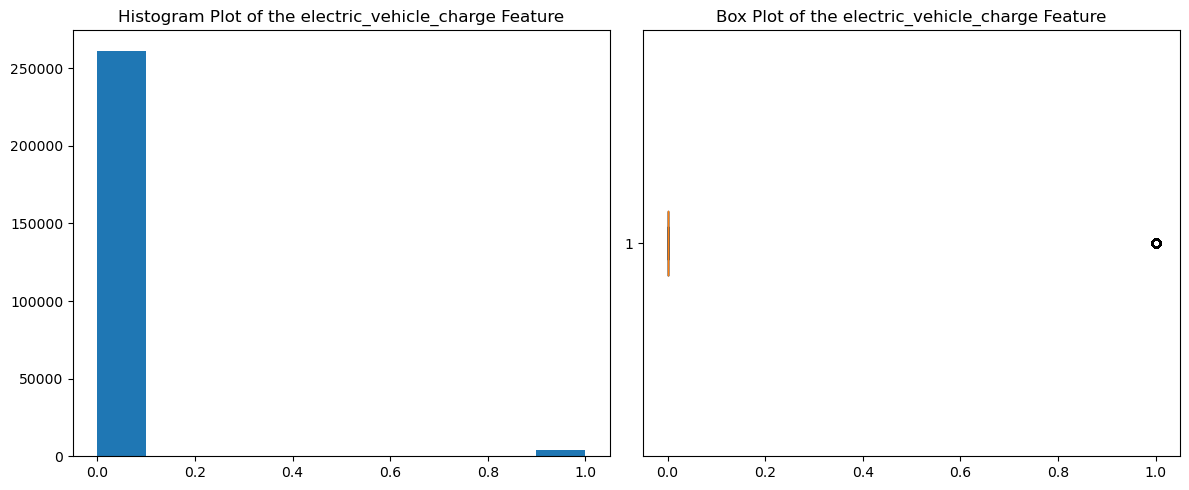

count    265190.000000
mean          0.048644
std           0.215124
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: comes_furnished, dtype: float64


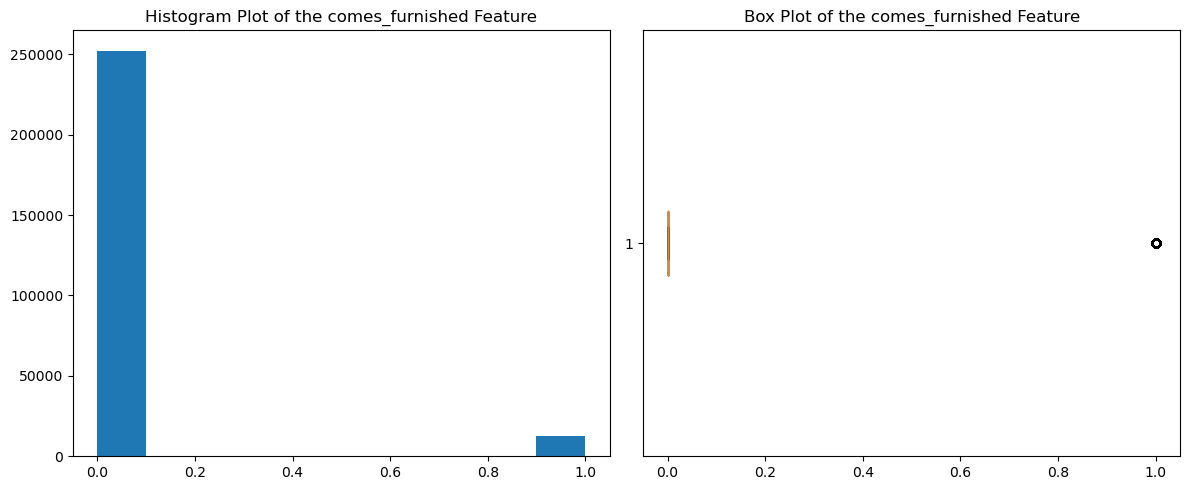

count    263771.000000
mean         37.208855
std           5.659648
min         -43.533300
25%          33.508500
50%          37.984900
75%          41.168400
max         102.036000
Name: lat, dtype: float64


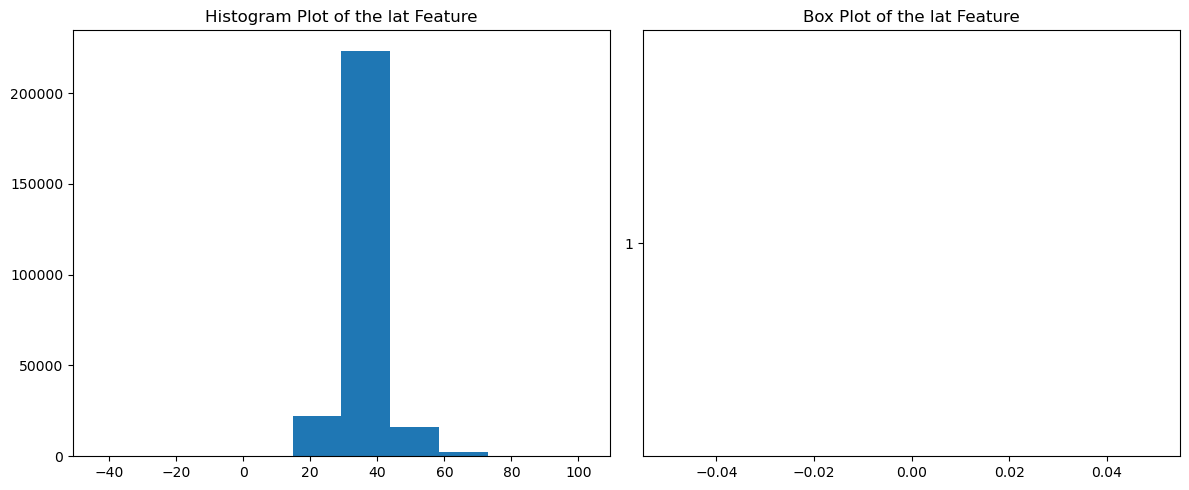

count    263771.000000
mean        -92.398149
std          17.370780
min        -163.894000
25%        -104.704000
50%         -86.478300
75%         -81.284600
max         172.633000
Name: long, dtype: float64


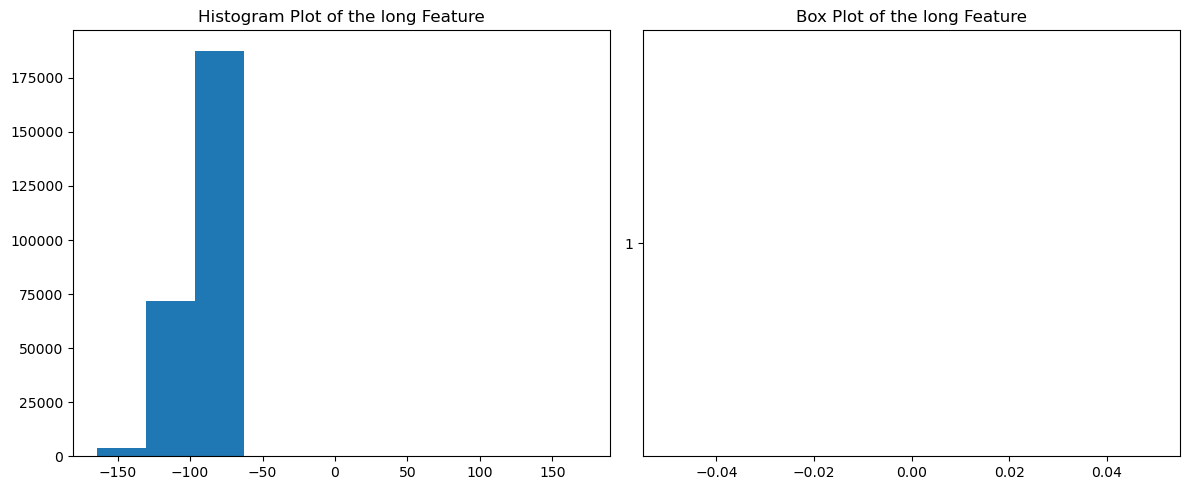

In [49]:
for col in numeric_cols[1:]:
    plot_distribution(df, col)

### numerical columns with outliers

- price
- sqfeet
- beds
- baths

## Checking Correlations

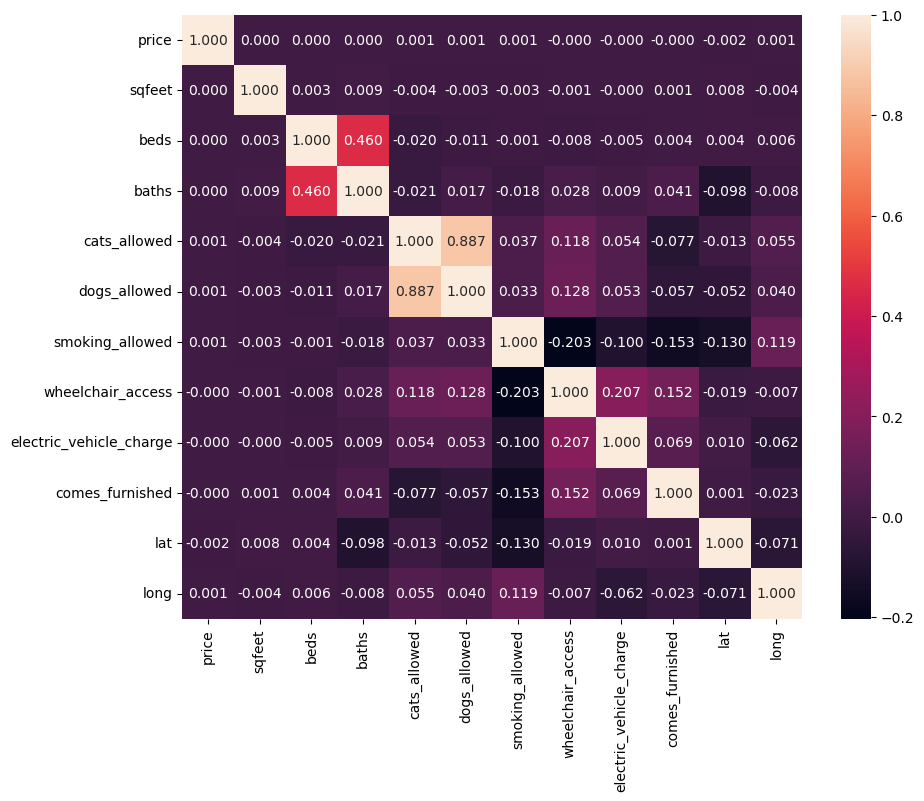

In [63]:
plt.figure(figsize=(10,8), dpi=100)

sns.heatmap(df[numeric_cols[1:]].corr(), annot=True, fmt=".3f");

- dogs_allowed and cats_allowed have high correlation, they can be combined in to a single column (pets_allowed maybe?)

## Checking the coordinates for curiosity

In [66]:
from mpl_toolkits.basemap import Basemap

In [67]:
lat = df["lat"].values
lon = df["long"].values

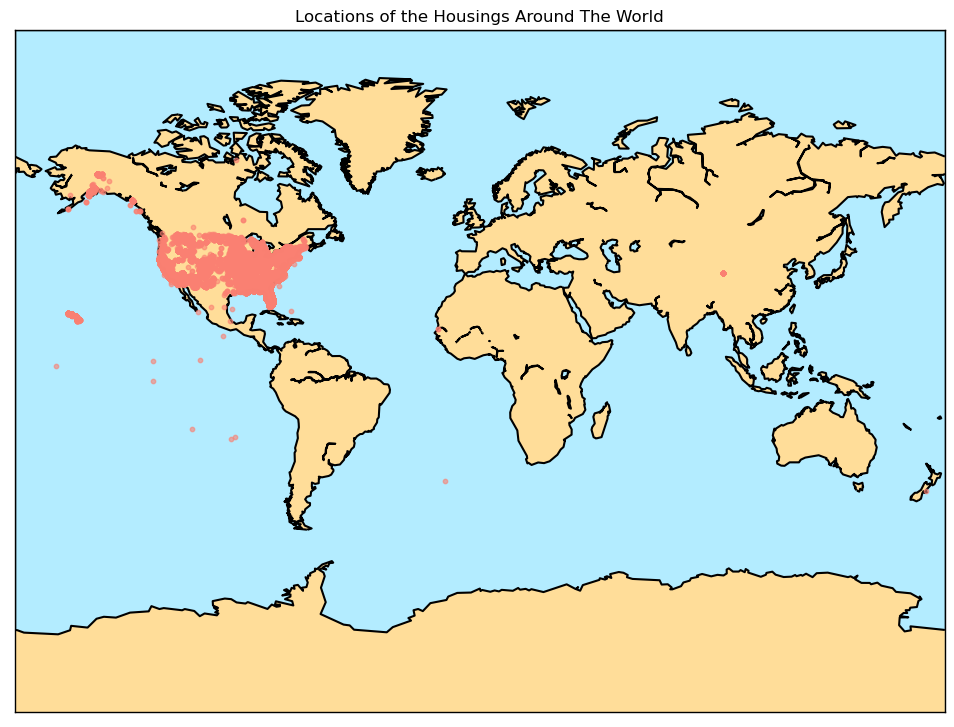

In [127]:
fig = plt.figure(figsize=(12,12), dpi=100)
m = Basemap(projection="mill",llcrnrlon=-180.,llcrnrlat=-90,urcrnrlon=180.,urcrnrlat=90)

m.drawmapboundary(fill_color="#b3ecff")
m.fillcontinents(color="#ffdd99",alpha=1)
m.drawcoastlines(color='black', linewidth=1.5)

m.scatter(lon, lat, latlon=True, s=10, color="salmon", alpha=0.6, zorder=2)

plt.title("Locations of the Housings Around The World", fontsize="large")
plt.show()

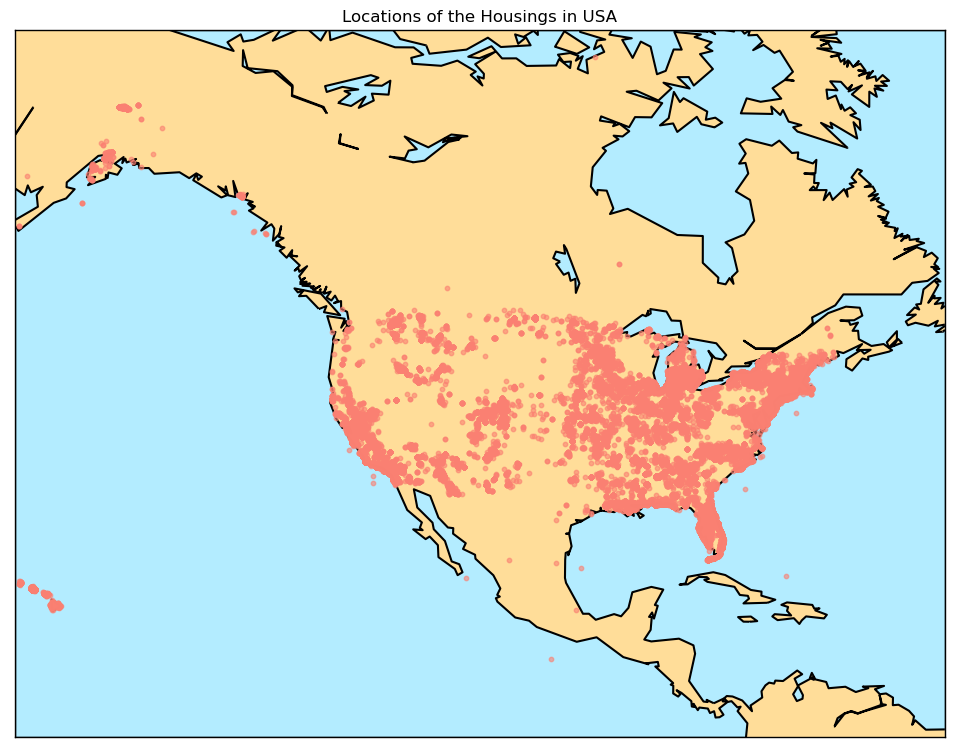

In [131]:
fig = plt.figure(figsize=(12,12), dpi=100)
m = Basemap(projection="mill",llcrnrlon=-160.,llcrnrlat=5,urcrnrlon=-55,urcrnrlat=70)


m.drawmapboundary(fill_color="#b3ecff")
m.fillcontinents(color="#ffdd99",alpha=1)
m.drawcoastlines(color='black', linewidth=1.5)

m.scatter(lon, lat, latlon=True, s=10, color="salmon", alpha=0.6, zorder=2)

plt.title("Locations of the Housings in USA", fontsize="large")
plt.show()

# Categorical Columns

In [155]:
cat_cols = df.select_dtypes(exclude=[int,float]).columns
cat_cols

Index(['url', 'region', 'region_url', 'type', 'laundry_options',
       'parking_options', 'image_url', 'description', 'state'],
      dtype='object')

In [156]:
cat_cols = cat_cols.delete([0, 2, 6, 7])
cat_cols

Index(['region', 'type', 'laundry_options', 'parking_options', 'state'], dtype='object')

In [157]:
def categorical_anaylsis(df, column):
    print(df[column].value_counts())
    print

In [158]:
df[cat_cols].describe()

,region,type,laundry_options,parking_options,state
count,265190,265190,210879,170055,265189
unique,298,12,5,7,38
top,jacksonville,apartment,w/d in unit,off-street parking,ca
freq,4246,218032,91074,88316,33085


# Notes for the data processing part

- price, sqfeet, beds, baths columns has outliers
- combine cats and dogs in to a single column (pets_allowed maybe?)
- encode 'region', 'type', 'laundry_options', 'parking_options', 'state' categorical features